<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_NaturalLanguageProcessing/blob/main/DataScience_NaturalLanguageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing**

# **Import Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [59]:
df = pd.read_table('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [61]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [62]:
df['Liked'].unique()

array([1, 0])

In [63]:
df['Liked'].nunique()

2

In [64]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

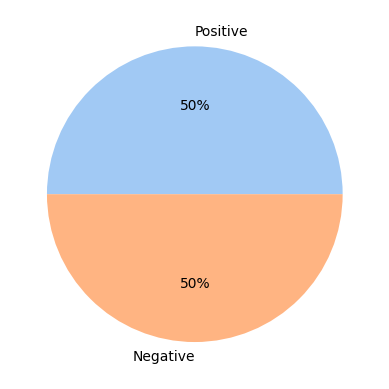

In [65]:
# Define Data
data = df['Liked'].value_counts()
labels = ['Positive', 'Negative']

# Define Pie Chart Color
colors = sns.color_palette('pastel')[0:5]

# Define Pie Chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# **Cleaning Text**

In [66]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# **Creating Bag of Words**

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

# **Splitting Training and Testing Dataset**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# **Training Naive Bayes Model on Training Set**

In [70]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred = clf.predict(X_test)
classifier_results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 67  50]
 [ 20 113]]


0.72

Text(0.5, 1.0, 'Accuracy Score 0.72')

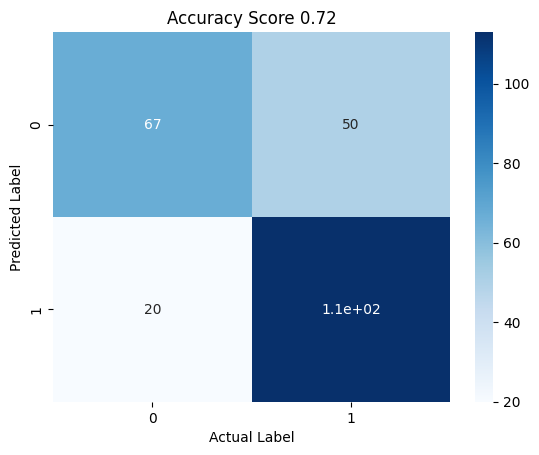

In [73]:
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred,y_test)}')

# **Training SVC Model on Training Set**

In [75]:
from sklearn.svm import SVC
clf_SVC = SVC()
clf_SVC.fit(X_train, y_train)

SVC()

In [76]:
y_pred = clf_SVC.predict(X_test)
classifier_results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[108   9]
 [ 51  82]]


0.76

Text(0.5, 1.0, 'Accuracy Score 0.76')

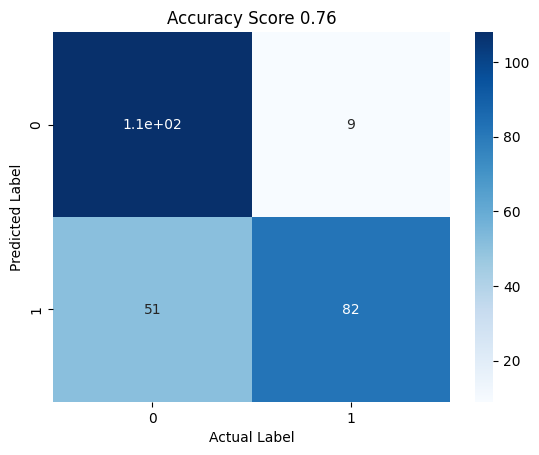

In [78]:
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred,y_test)}')

# **Training RFC Model on Training Set**

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC = RandomForestClassifier()
clf_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred = clf_RFC.predict(X_test)
classifier_results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[106  11]
 [ 60  73]]


0.716

Text(0.5, 1.0, 'Accuracy Score 0.716')

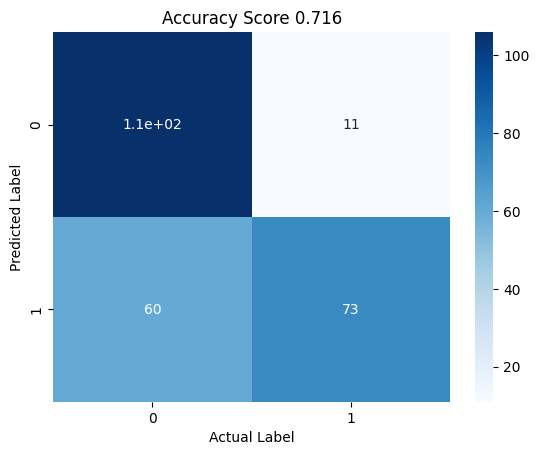

In [84]:
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred,y_test)}')